In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('Iris.csv')

# Drop Id column as it's not a feature
df = df.drop('Id', axis=1)

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Encode target variable (Species)
df['Species'] = df['Species'].astype('category').cat.codes

# Standardize numerical features
scaler = StandardScaler()
feature_cols = df.columns.drop('Species')
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save cleaned dataset
df.to_csv('Iris_Cleaned.csv', index=False)
print('\nCleaned Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 

Summary Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02  150.000000
mean   -4.736952e-16 -6.631732e-16   3.315866e-16 -2.842171e-16    1.000000
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00    0.819232
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00    0.000000
25%    -9.006812e-01 -5.877635e-01  -1.227541e+00 -1.181504e+00    0.000000
50%    -5.250608e-02 -1.249576e-01   3.362659e-01  1.332259e-01    1.000000
75%     6.745011e-01  5.692513e-01   7.627586e-01  7.905908e-01    2.000000
max     2.492019e+00  3.114684e+00   1.786341e+00  1.710902e+00    2.000000


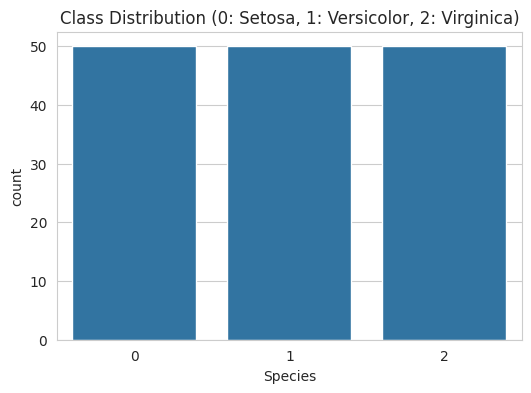

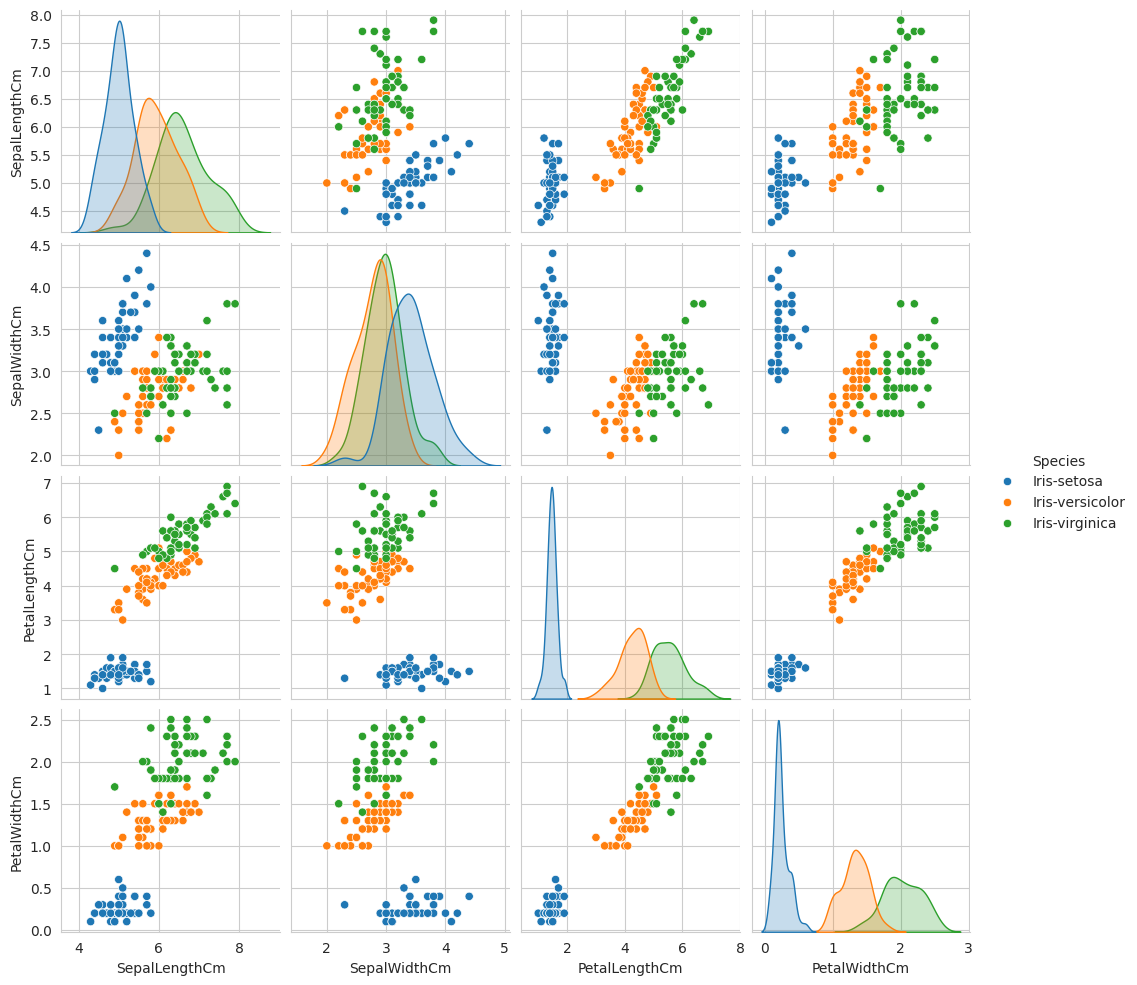

In [4]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df)
plt.title('Class Distribution (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.savefig('class_distribution.png')
plt.show()

# Pairplot for feature relationships (use original data for visualization)
df_original = pd.read_csv('Iris.csv')
sns.pairplot(df_original.drop('Id', axis=1), hue='Species')
plt.savefig('pairplot.png')
plt.show()

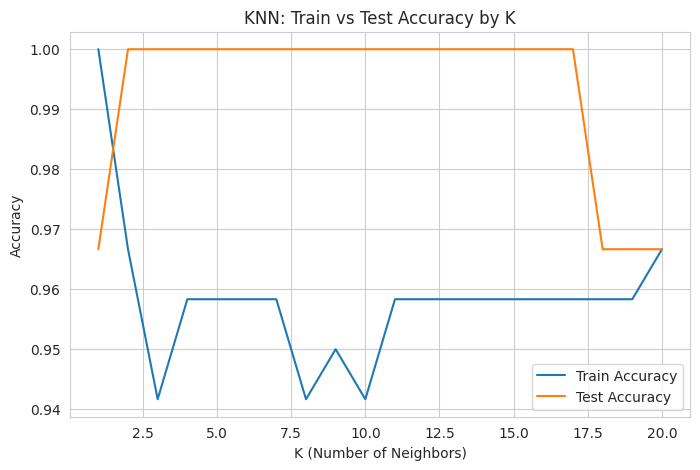

KNN Accuracy (K=5): 1.0000


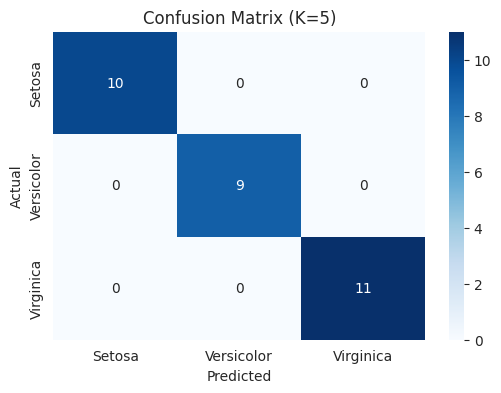


Classification Report (K=5):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
# Prepare data
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different K values
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN: Train vs Test Accuracy by K')
plt.legend()
plt.savefig('k_tuning.png')
plt.show()

# Train KNN with optimal K (e.g., 5)
optimal_k = 5
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy (K={optimal_k}): {knn_accuracy:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix (K=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# Classification report
print('\nClassification Report (K=5):')
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

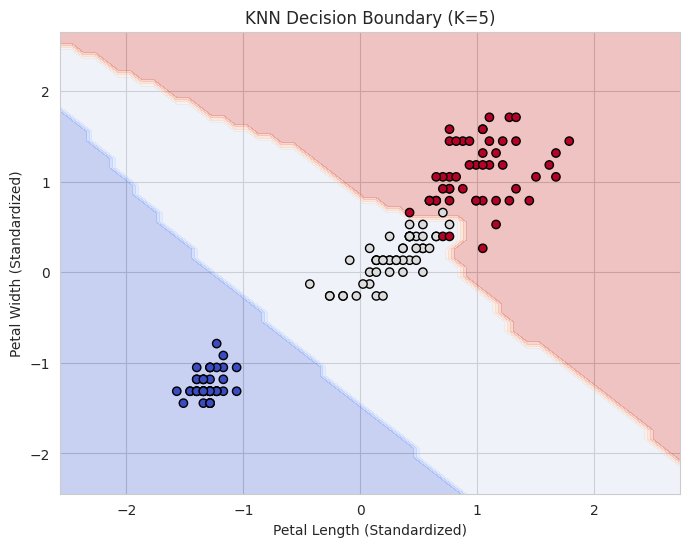

In [6]:
# Visualize decision boundaries using two features (PetalLengthCm, PetalWidthCm)
X_2d = X[['PetalLengthCm', 'PetalWidthCm']]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create mesh grid for decision boundary
x_min, x_max = X_2d['PetalLengthCm'].min() - 1, X_2d['PetalLengthCm'].max() + 1
y_min, y_max = X_2d['PetalWidthCm'].min() - 1, X_2d['PetalWidthCm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d['PetalLengthCm'], X_2d['PetalWidthCm'], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title(f'KNN Decision Boundary (K={optimal_k})')
plt.savefig('decision_boundary.png')
plt.show()